In [ ]:
import os
os.chdir("../..")
import hamiltonian
import sympy as sp

# Example 2

This Jupyter notebook is intended to provide an example of using the `hamiltonian` package to generate the Hamiltonian for the Pais-Uhlenbeck Oscillator. This notebook is intended to mirror the example given in Section II.D of "The First Variational Formula and the Ostrogradsky Formalism". The Lagrangian is given by

$L = \frac{1}{2}\left[\ddot{x}^2 - (\omega_1^2 + \omega_2^2)\dot{x}^2 - \omega_1^2\omega_2^2 x^2 \right] - \frac{\Lambda x^4}{4}$

This Lagrangian is relevant in the search for renormalizable quantum field theories of gravity.

In [4]:
# Allow for pretty printing of sympy expressions
sp.init_printing()

# Define constants using sympy
Lambda, omega_1, omega_2 = sp.symbols('Lambda omega_1 omega_2', real=True, positive=True)

# Use the hamiltonian module to define a coordinate system
coordinate_system = hamiltonian.CoordinateSystem("t", ["x"])
t = coordinate_system.independent_variable
x = coordinate_system.get_coordinate("x")

display(t, x)

Use Sympy to define the Lagrangian:

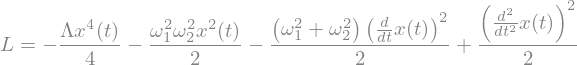

In [7]:
L = sp.Rational(1,2) * ((x.diff(t,2))**2 - (omega_1**2 + omega_2**2)* (x.diff(t))**2 - (omega_1*omega_2*x)**2) - Lambda/4 * x**4
sp.Eq(sp.Symbol("L"), L)

Use `hamiltonian.hamiltonian()` to compute the Hamiltonian using Ostrogradsky's formalism.

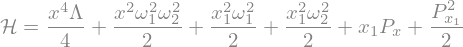

In [8]:
# Compute Hamiltonian
phase_space = hamiltonian.hamiltonian(L, coordinate_system)
sp.Eq(sp.Symbol("\mathcal{H}"), phase_space.hamiltonian)

Use `hamiltonian.PhaseSpace.hamiltons_equations()` to compute Hamilton's Equations for the computed Hamiltonian.

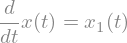

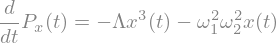

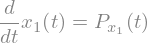

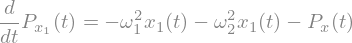

In [9]:
hamiltons_equations = phase_space.hamiltons_equations()
for eq in hamiltons_equations:
    display(eq)